# CGM dataset  

### Description 

Continuous Glucose Monitoring (CGM) measures glucose levels in a continuous manner. This measure provides information on blood glucose control and glucose variability and could be used to monitor patients with diabetes.

### Introduction

In healthy individuals, insulin secretion from the pancreas is responsible for maintaining normal blood glucose levels. Insulin resistance, the main cause of type-2 diabetes and a key aspect in several other metabolic disorders, occurs when the sensitivity to insulin is impaired leading to reduced insulin mediated glucose disposal. Measuring insulin levels is complex and requires special laboratory tests, while glucose levels are measured by simple blood tests. 

Although measuring blood glucose levels using a blood test is simple and inexpensive, a single measure of blood glucose will not contain information on glucose variability, and might not be accurate in certain conditions. 

CGM provides continuous measures of the glucose levels in the interstitial fluid, through a tiny electrochemical sensor electrode inserted under the skin. The continuous measures obtained with CGM present a tool to overcome the limitations of a single measure of blood glucose through blood tests, by providing real time information of glucose levels, rate of change, variability and impending hypo- and hyper- glycemia events.

Currently approved CGM devices use an enzymatic technology which reacts with glucose molecules in the interstitial fluid generating an electric current. This current is proportional to glucose concentration in the blood, thus providing information of blood glucose levels in a continuous manner.

Coupled with nutritional and behavioral information, data collected from the CGM could be used in research to better understand mechanisms of glucose response and control, and how these changes in different individuals, lifestyle choices and phenotypes.

The Human Phenotype Project (HPP) collects CGM data on each participant, to produce blood glucose measures every 15 minutes, for a total connection period of two weeks. Summary statistics are calculated for each CGM connection using the [iglu package](https://github.com/irinagain/iglu) ([Broll et al., 2021](https://doi.org/10.1371/journal.pone.0248560)), providing varying summary measures of glucose control and variability. 

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
FreeStyle Libre ProIQ Flash device (see figure below) is used for continuous glucose monitoring for a 2-week period in the baseline visit only. During this time participants are also required to log information about food, medications, physical activity and sleep hours using the 10K application.
During the baseline visit the sensor is placed on the participant’s upper arm back.

The figure illustrates the connection procedure of the device. Once attached the device is also activated. It is explained to the participant that in case of MRI the sensor should be removed before the scan, and that it is not possible to dive with the device deeper than one meter. The participant is requested to remove the device independently at the end of the 2-week period and send it back to the clinic.  

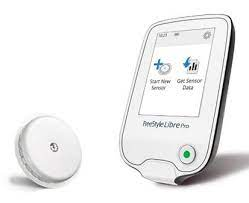

### Data availability 
<!-- for the example notebooks -->
The metadata and summary features are stored in 3 main statistics parquet files: `cgm.parquet`, `iglu.parquet`, `iglu_daily.parquet` (Computed using the iglu package).

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/017-cgm.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/17)


In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from pheno_utils import PhenoLoader

In [2]:
pl = PhenoLoader('cgm', base_path='s3://pheno-synthetic-data/data')
pl

/home/ec2-user/miniconda3/lib/python3.11/site-packages/pheno_utils/pheno_loader.py:660: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  age_df['birth_date'] = pd.to_datetime(


PhenoLoader for cgm with
95 fields
4 tables: ['cgm', 'iglu', 'iglu_daily', 'age_sex']

# Data dictionary

In [ ]:
pl.dict.head(10)

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,bulk_file_extension,...,sexed,debut,completed,customer_field,dependency,old_data_loader,old_lab_data_column_name,min_plausible_value,max_plausible_value,parent_dataframe
tabular_field_name,,,,,,,,,,,,,,,,,,,,,
cgm_time_series,CGM timeseries,File containing the participants' CGM timeseries,17,timeseries,Time series file (individual),Primary,NaN,Single,string,.parquet,...,Both sexes,2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
connection_id,ConnectionID,CGM device connection id,17,cgm,Text,Auxiliary,NaN,Single,int,NaN,...,Both sexes,2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collection_timestamp,Collection timestamp,CGM connection first data point timestamp,17,cgm,Datetime,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,...,Both sexes,2018-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cgm_connection_first_date,CGM first date,CGM connection first date,17,cgm,Date,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,...,Both sexes,2018-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cgm_connection_last_date,CGM last date,CGM connection last date,17,cgm,Date,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,...,Both sexes,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cgm_device_type,CGM Device type,CGM Device type,17,cgm,Text,Auxiliary,017_01,Single,category_ordered,NaN,...,Both sexes,2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_cgm_datapoints_lost_in_qc,CGM datapoints lost in QC,Number of CGM datapoints lost in QC,17,cgm,Integer,Auxiliary,NaN,Single,int,NaN,...,Both sexes,2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percentage_of_cgm_datapoints_lost_in_qc,Percentage of CGM datapoints lost in QC,NaN,17,cgm,Continuous,Auxiliary,NaN,Single,float,NaN,...,Both sexes,2018-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_cgm_days_available_for_the_connection,Number of CGM days available,Number of CGM days available for the connection,17,cgm,Integer,Auxiliary,NaN,Single,int,NaN,...,Both sexes,2018-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# CGM main file

The main_cgm file contains metadata summary information on all CGM connections.

Each row holds information on a single CGM connection. The column cgm_time_series contains the path to the file holding the actual CGM timeseries data for each connection.

In [ ]:
pl.dfs['cgm'].head()

,,,,cgm_time_series,connection_id,collection_timestamp,cgm_device_type,percentage_of_cgm_datapoints_lost_in_qc,timezone
participant_id,cohort,research_stage,array_index,,,,,,
5309837561,10k,00_00_visit,0,s3://pheno-synthetic-data/data/cgm/timeseries/...,2479747070,2022-12-30 00:14:00,abbott_freestyle_libre_pro_iq,NaN,asia/jerusalem
5027574288,10k,00_00_visit,0,s3://pheno-synthetic-data/data/cgm/timeseries/...,4310873274,NaT,abbott_freestyle_libre_pro_iq,NaN,asia/jerusalem
7783260382,10k,00_00_visit,0,s3://pheno-synthetic-data/data/cgm/timeseries/...,5902733005,NaT,abbott_freestyle_libre_pro,NaN,asia/jerusalem
1178277844,10k,00_00_visit,0,s3://pheno-synthetic-data/data/cgm/timeseries/...,7190428580,NaT,abbott_freestyle_libre_pro_iq,0.068636,asia/jerusalem
1622660825,10k,00_00_visit,0,s3://pheno-synthetic-data/data/cgm/timeseries/...,7962868917,NaT,abbott_freestyle_libre_pro_iq,NaN,asia/jerusalem


# iglu file

The iglu file contains clinical summary statistics calculated from the entire CGM connection.

Each row holds information on a single CGM connection.

In [ ]:
pl.dfs['iglu'].head()

,,,,cgm_1st_quartile,cgm_3rd_quartile,cgm_above_140,cgm_above_180,cgm_above_250,cgm_below_54,cgm_below_70,cgm_in_range_63_140,cgm_in_range_70_180,cgm_adrr,...,cgm_modd,cgm_range,cgm_sd,cgm_sd_roc,cgm_sdb,cgm_sdbdm,cgm_sddm,cgm_sdhhmm,cgm_sdw,cgm_sdwsh
participant_id,cohort,research_stage,array_index,,,,,,,,,,,,,,,,,,,,,
5309837561,10k,00_00_visit,0,NaN,NaN,NaN,NaN,0.004056,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.342042,NaN
5027574288,10k,00_00_visit,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,149.486317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7783260382,10k,00_00_visit,0,NaN,NaN,NaN,NaN,0.006133,NaN,7.584122,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.270560,NaN,NaN,NaN,NaN
1178277844,10k,00_00_visit,0,NaN,NaN,NaN,NaN,NaN,0.486334,NaN,95.440232,NaN,NaN,...,12.262271,NaN,NaN,NaN,NaN,8.349268,NaN,NaN,NaN,NaN
1622660825,10k,00_00_visit,0,116.201887,NaN,NaN,1.021194,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# iglu daily file

The iglu daily file contains clinical summary statistics calculated for each day of each CGM connection.

Each row holds information on a single day from a CGM connection.

In [ ]:
pl.dfs['iglu_daily'].head()

,,,,collection_date,connection_day,cgm_daily_1st_quartile,cgm_daily_3rd_quartile,cgm_daily_above_140,cgm_daily_above_180,cgm_daily_above_250,cgm_daily_below_54,cgm_daily_below_70,cgm_daily_in_range_63_140,...,cgm_daily_mag,cgm_daily_mage,cgm_daily_min,cgm_daily_max,cgm_daily_mean,cgm_daily_median,cgm_daily_range,cgm_daily_sd,cgm_daily_sd_roc,cgm_daily_sdwsh
participant_id,cohort,research_stage,array_index,,,,,,,,,,,,,,,,,,,,,
5309837561,10k,00_00_visit,0,2022-12-10 16:00:26.369930496,1,73.244247,99.078877,0.000000,0.0,0.0,0.000000,1.013018,85.552574,...,9.645209,13.082715,71.628776,112.792541,105.754662,96.735804,148.671647,23.174305,0.474642,4.649267
5027574288,10k,00_00_visit,0,2022-09-23 01:32:08.461041920,1,90.690791,109.849373,6.121283,0.0,0.0,1.619575,0.102404,94.438450,...,17.045745,51.239501,56.047961,163.761120,94.298353,103.319457,145.727653,23.447262,0.773045,8.762401
7783260382,10k,00_00_visit,0,2019-08-30 01:56:49.939567872,1,74.641537,97.370676,0.000000,0.0,0.0,1.083988,16.642211,87.617490,...,15.515826,40.514917,54.478009,164.459427,91.376919,93.942667,123.129704,23.178019,0.828309,7.799843
1178277844,10k,00_00_visit,0,2022-12-30 00:00:00.000000000,1,85.778700,95.525673,0.000000,0.0,0.0,0.000000,7.596950,99.445247,...,7.892371,10.490914,51.762407,113.417443,96.297896,90.490940,54.449557,8.493026,0.436782,4.560506
1622660825,10k,00_00_visit,0,2022-12-09 08:25:32.371571200,1,106.399261,102.676273,15.212098,0.0,0.0,0.000000,0.294237,81.482078,...,12.979227,31.875477,82.613443,210.694124,122.804372,141.090629,132.445746,17.153655,0.628381,6.225139


# Plot histogram and ecdf for eA1C


In [7]:
from pheno_utils.basic_plots import hist_ecdf_plots

In [ ]:
# filter out baseline visit
col = 'cgm_ea1c'

df = pl[[col, 'age', 'sex']]

df.head()

,,,,cgm_ea1c,age,sex
participant_id,cohort,research_stage,array_index,,,
5309837561,10k,00_00_visit,0,NaN,NaN,NaN
5027574288,10k,00_00_visit,0,NaN,54.169913,Male
7783260382,10k,00_00_visit,0,NaN,45.892093,Male
1178277844,10k,00_00_visit,0,NaN,44.435100,Female
1622660825,10k,00_00_visit,0,NaN,44.621536,Male


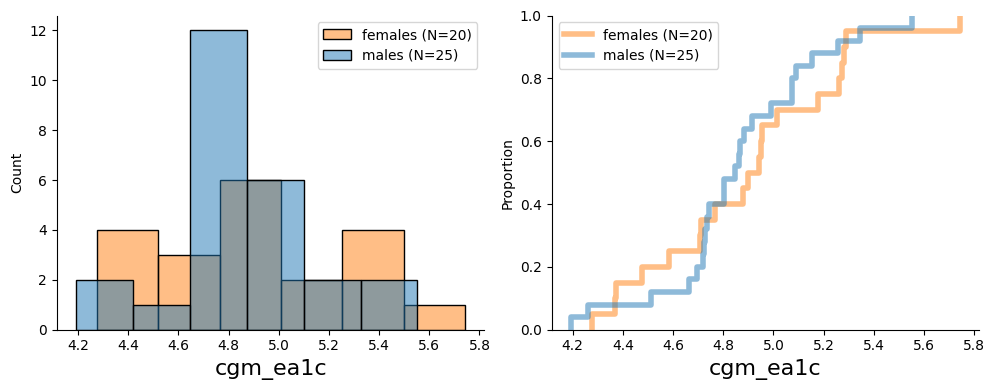

,count,mean,std,min,25%,50%,75%,max
cgm_ea1c,45.0,4.87623,0.334223,4.193397,4.710427,4.867059,5.073236,5.742376


In [9]:
# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col, "sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)

# Plot age-sex reference plots

In [10]:
from pheno_utils.age_reference_plots import GenderAgeRefPlot

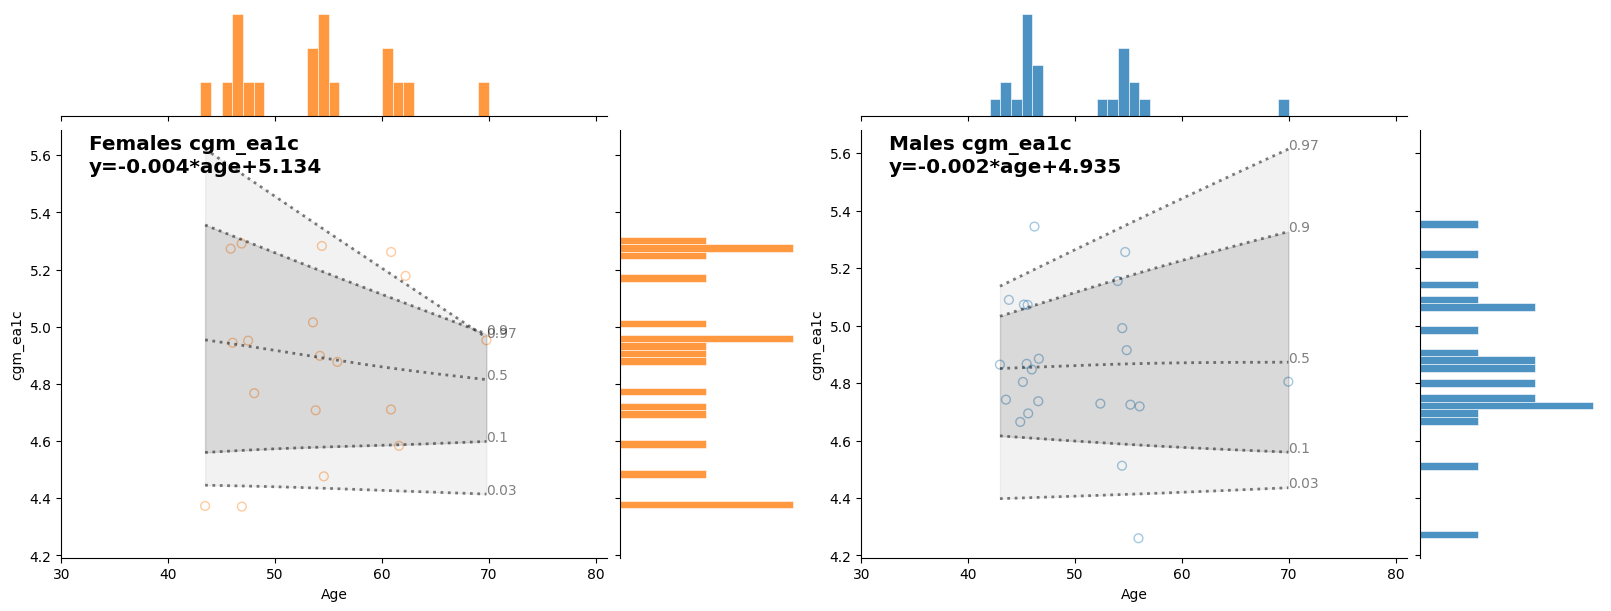

In [11]:
gender_refplots = GenderAgeRefPlot(df.dropna(subset=[col,"sex", "age"]), "cgm_ea1c", age_col="age")
gender_refplots.plot()

# Glucose time-series

CGM connections can be accessed using the `load_bulk_data` function

In [12]:
cgm_timeseries = pl.load_bulk_data('cgm_time_series', participant_id=5309837561)
cgm_timeseries

glucose
participant_id cohort research_stage array_index connection_id collection_timestamp              
5309837561     10k    00_00_visit    0           3419931422    2020-06-22 00:14:00+03:00    106.2
                                                               2020-06-22 00:29:00+03:00    100.8
                                                               2020-06-22 00:44:00+03:00     97.2
                                                               2020-06-22 00:59:00+03:00     95.4
                                                               2020-06-22 01:14:00+03:00     93.6
...                                                                                           ...
                                                               2020-07-04 22:59:00+03:00    102.6
                                                               2020-07-04 23:14:00+03:00     97.2
                                                               2020-07-04 23:29:00+03:00     90.0
                                                               2020-07-04 23:44:00+03:00     91.8
                                                               2020-07-04 23:59:00+03:00     97.2

[1248 rows x 1 columns]

/home/ec2-user/miniconda3/lib/python3.11/site-packages/pheno_utils/cgm_plots.py:86: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate(method="cubicspline")


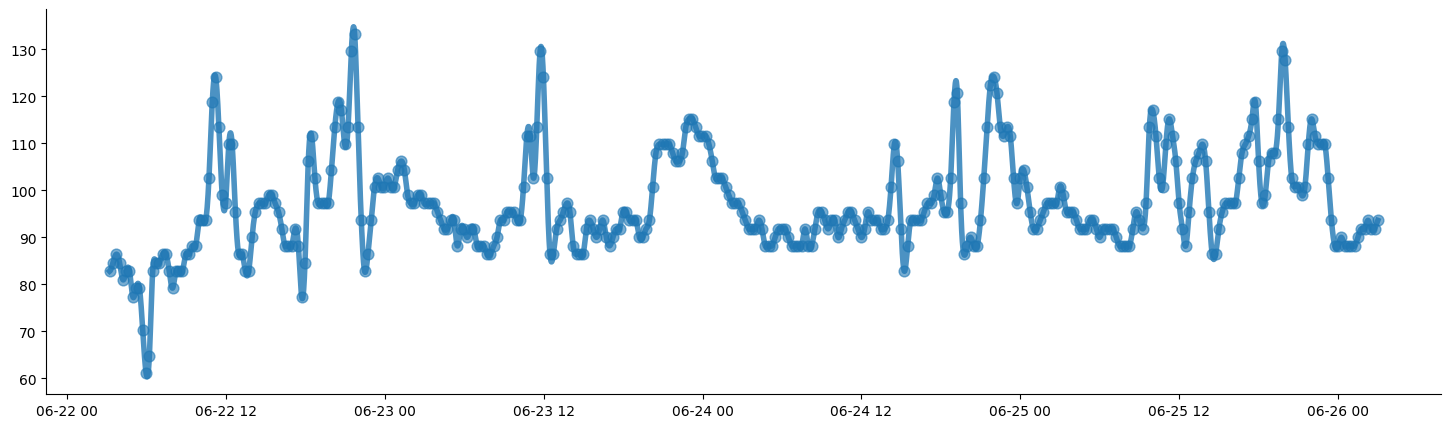

In [13]:
from pheno_utils import CGMPlot
import pandas as pd

start_date = pd.to_datetime('2020-06-22', utc=True).tz_convert('Asia/Jerusalem')
end_date = pd.to_datetime('2020-06-26',utc=True).tz_convert('Asia/Jerusalem')

sample_days = cgm_timeseries[(cgm_timeseries.index.get_level_values('collection_timestamp') >= start_date) \
                             & (cgm_timeseries.index.get_level_values('collection_timestamp') <= end_date)]
     
cgmplt = CGMPlot(cgm_df=sample_days.reset_index(),
                 cgm_date_col="collection_timestamp",
                 gluc_col="glucose",
                 smooth=True)
cgmplt.plot()